In [1]:
!pip install tensorflow

In [2]:
!pip install split-folders

In [3]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from tqdm import tqdm
from torch import optim
import torchvision
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPool2D, GlobalAvgPool2D
from tensorflow.keras.layers import Add, ReLU, Dense
from tensorflow.keras import Model
import pandas as pd
from torch.utils.data import Dataset
import torch.nn.functional as F
from torch.utils.data import DataLoader
import re
from torchvision import transforms
import splitfolders
import numpy as np
import copy
import matplotlib.image as mpimg
import random
import cv2
from google.colab.patches import cv2_imshow
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
import seaborn as sns
import random
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix

print("Current device:", device)
if torch.cuda.is_available():
  print(" Type:", torch.cuda.get_device_name(0))

Current device: cpu


# **mnist**

In [ ]:
train_url = "https://raw.githubusercontent.com/andrea-prodon/Multimodal-Interaction/main/dataset/sign_mnist_train.csv"
train_data = pd.read_csv(train_url)
test_url = "https://raw.githubusercontent.com/andrea-prodon/Multimodal-Interaction/main/dataset/sign_mnist_test.csv"
test_data = pd.read_csv(test_url)
print(train_data.shape, test_data.shape)
train_data.head(5)

(27455, 785) (7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['pixel1'].plot(kind='hist', bins=20, title='pixel1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['pixel2'].plot(kind='hist', bins=20, title='pixel2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['pixel3'].plot(kind='hist', bins=20, title='pixel3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='label', y='pixel1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='pixel1', y='pixel2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='pixel2', y='pixel3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='pixel3', y='pixel4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['pixel1'].plot(kind='line', figsize=(8, 4), title='pixel1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['pixel2'].plot(kind='line', figsize=(8, 4), title='pixel2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['pixel3'].plot(kind='line', figsize=(8, 4), title='pixel3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# define X and Y
X_train = train_data.drop(['label'], axis = 1)
X_test=test_data.drop(['label'],axis=1)
Y_train = train_data['label']
Y_test= test_data['label']

# convert data to np.array
X_train = X_train.values
X_test = X_test.values

#reshaing the images
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


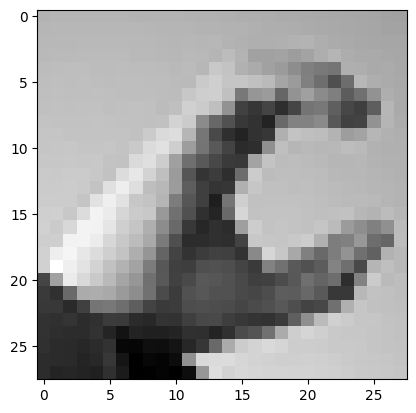

In [ ]:
# show sample from dataset
image_shape = (28,28)
example = random.randint(0, 20000)
image_pixels = train_data.loc[example][1:785]
image_array = np.array(image_pixels).reshape(image_shape)
plt.imshow(image_array, cmap='gray')
plt.show()

# **asl dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
GDRIVE_DIR = "/content/drive"
GDRIVE_HOME_DIR = GDRIVE_DIR + "/MyDrive/Multimodal/Colabs"
GDRIVE_DATA_DIR = GDRIVE_HOME_DIR + "/asl_dataset/"
print(GDRIVE_DATA_DIR)

/content/drive/MyDrive/Multimodal/Colabs/asl_dataset/


In [ ]:
sub_dirs = os.listdir("/content/drive/MyDrive/Multimodal/Colabs/asl_dataset")
print(sub_dirs)

['0', '2', '3', '6', '5', '4', '8', '1', '7', '9', 'a', 'b', 'c', 'i', 'j', 'e', 'h', 'k', 'd', 'g', 'f', 'l', 'm', 'n', 'o', 'p', 'r', 'w', 'q', 'u', 'y', 's', 'v', 't', 'x', 'z']


In [ ]:
def plot_image(img_path):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

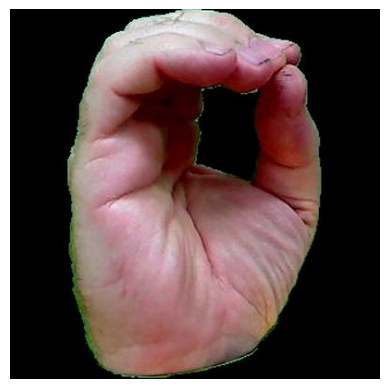

In [ ]:
for dir in sub_dirs:
  path = GDRIVE_DATA_DIR + dir + "/"
  files = [f for f in os.listdir(path) if os.path.isfile(path + f)]
  for img in files:
    plot_image(path + img)
    break
  break

In [ ]:
# Path where our data is located
base_path = "/content/drive/MyDrive/Multimodal/Colabs/asl_dataset/"

# Dictionary to save our 36 classes
categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(
        lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2]
        + "/"
        + x
    )
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)
df.head(7)

,filename,category
0,y/hand4_y_bot_seg_1_cropped.jpeg,34
1,t/hand2_t_right_seg_4_cropped.jpeg,29
2,h/hand1_h_top_seg_3_cropped.jpeg,17
3,v/hand2_v_bot_seg_1_cropped.jpeg,31
4,b/hand2_b_left_seg_2_cropped.jpeg,11
5,z/hand5_z_bot_seg_5_cropped.jpeg,35
6,m/hand1_m_top_seg_2_cropped.jpeg,22


In [ ]:
plt.figure(figsize=(40,40))

for i in range(100):
    path = base_path + df.filename[i]
    img = plt.imread(path)
    plt.subplot(10,10, i + 1)
    plt.imshow(img)
    plt.title(categories[df.category[i]],fontsize=35,fontstyle='italic')
    plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#splitfolders.ratio('/content/drive/MyDrive/Multimodal/Colabs/asl_dataset',output='/content/drive/MyDrive/Multimodal/Colabs/train_test', seed=1333, ratio=(0.8,0.1,0.1))

In [ ]:
datagen = ImageDataGenerator(rescale= 1.0 / 255)
train_path = '/content/drive/MyDrive/Multimodal/Colabs/train_test/train'
val_path = '/content/drive/MyDrive/Multimodal/Colabs/train_test/val'
test_path = '/content/drive/MyDrive/Multimodal/Colabs/train_test/test'

batch = 32
image_size = 200
img_channel = 3
n_classes = 36

train_data = datagen.flow_from_directory(directory= train_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory= val_path,
                                       target_size=(image_size,image_size),
                                       batch_size = batch,
                                       class_mode='categorical',
                                       )

test_data = datagen.flow_from_directory(directory= test_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical',
                                         shuffle= False)

Found 2012 images belonging to 36 classes.
Found 251 images belonging to 36 classes.
Found 252 images belonging to 36 classes.


# **CNN**

In [ ]:
model = Sequential()

model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = (image_size,image_size,img_channel)))
model.add(Conv2D(32,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(Conv2D(64,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(Conv2D(128,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(36, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      36928     
                                                        

In [ ]:
early_stoping = EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True,
                              verbose = 0)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy',
                                         patience = 2,
                                         factor=0.5 ,
                                         verbose = 1)

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
asl_class = model.fit(train_data,
                      validation_data= val_data,
                      epochs=30,
                      callbacks=[early_stoping,reduce_learning_rate],
                      verbose = 1)

Epoch 1/30
63/63 [==============================] - 697s 11s/step - loss: 2.3762 - accuracy: 0.3593 - val_loss: 0.5982 - val_accuracy: 0.8127 - lr: 0.0010
Epoch 2/30
63/63 [==============================] - 660s 10s/step - loss: 0.6711 - accuracy: 0.7947 - val_loss: 0.2284 - val_accuracy: 0.9323 - lr: 0.0010
Epoch 3/30
63/63 [==============================] - 690s 11s/step - loss: 0.3404 - accuracy: 0.8912 - val_loss: 0.1669 - val_accuracy: 0.9442 - lr: 0.0010
Epoch 4/30
13/63 [=====>........................] - ETA: 8:25 - loss: 0.1813 - accuracy: 0.9490

In [ ]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(asl_class.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [ ]:
# prediction
result = model.predict(test_data,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

# Evaluvate
loss,acc = model.evaluate(test_data,verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

In [ ]:
p = y_pred
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

In [ ]:
print(classification_report(y_true, y_pred,target_names= categories.values()))

# **RESNET50**

In [ ]:
INPUT_SHAPE = (image_size,image_size,img_channel)
NUMBER_OF_CLASSESS = 36

In [ ]:
def conv_batchnorm_relu(x, filters, kernel_size, strides=1):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

In [ ]:
def identity_block(tensor, filters):
    x = conv_batchnorm_relu(tensor, filters=filters, kernel_size=1, strides=1)
    x = conv_batchnorm_relu(x, filters=filters, kernel_size=3, strides=1)
    x = Conv2D(filters=4*filters, kernel_size=1, strides=1)(x)
    x = BatchNormalization()(x)
    x = Add()([tensor,x]) # skip connection
    x = ReLU()(x)
    return x

In [ ]:
def projection_block(tensor, filters, strides):

     #left stream
     x = conv_batchnorm_relu(tensor, filters=filters, kernel_size=1, strides=strides)
     x = conv_batchnorm_relu(x, filters=filters, kernel_size=3, strides=1)
     x = Conv2D(filters=4*filters, kernel_size=1, strides=1)(x)
     x = BatchNormalization()(x)

     #right stream
     shortcut = Conv2D(filters=4*filters, kernel_size=1, strides=strides)(tensor)
     shortcut = BatchNormalization()(shortcut)
     x = Add()([shortcut,x])    #skip connection
     x = ReLU()(x)
     return x

In [ ]:
def resnet_block(x, filters, reps, strides):

    x = projection_block(x, filters, strides)
    for _ in range(reps-1):
        x = identity_block(x,filters)
    return x

In [ ]:
input = Input(shape=INPUT_SHAPE)


x = conv_batchnorm_relu(input, filters=64, kernel_size=7, strides=2)
x = MaxPool2D(pool_size = 3, strides =2)(x)
x = resnet_block(x, filters=64, reps =3, strides=1)
x = resnet_block(x, filters=128, reps =4, strides=2)
x = resnet_block(x, filters=256, reps =6, strides=2)
x = resnet_block(x, filters=512, reps =3, strides=2)
x = GlobalAvgPool2D()(x)


output = Dense(NUMBER_OF_CLASSESS, activation ='softmax')(x)


model = Model(inputs=input, outputs=output)

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
asl_class = model.fit(train_data,
                      validation_data= val_data,
                      epochs=5,
                      callbacks=[early_stoping,reduce_learning_rate],
                      verbose = 1)

Epoch 1/5
63/63 [==============================] - 1546s 24s/step - loss: 0.0186 - accuracy: 0.9960 - val_loss: 0.3689 - val_accuracy: 0.8805 - lr: 5.0000e-04
Epoch 2/5
63/63 [==============================] - 1525s 24s/step - loss: 0.0426 - accuracy: 0.9896 - val_loss: 0.7317 - val_accuracy: 0.8367 - lr: 5.0000e-04
Epoch 3/5
63/63 [==============================] - 1502s 24s/step - loss: 0.0409 - accuracy: 0.9916 - val_loss: 0.2492 - val_accuracy: 0.9283 - lr: 5.0000e-04
Epoch 4/5
63/63 [==============================] - 1496s 24s/step - loss: 0.1709 - accuracy: 0.9448 - val_loss: 8.6069 - val_accuracy: 0.2869 - lr: 5.0000e-04
Epoch 5/5
63/63 [==============================] - ETA: 0s - loss: 0.1425 - accuracy: 0.9558 
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
63/63 [==============================] - 1526s 24s/step - loss: 0.1425 - accuracy: 0.9558 - val_loss: 0.8758 - val_accuracy: 0.7809 - lr: 5.0000e-04


In [ ]:
# Evaluate for train generator
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 82.75347948074341
The Loss of the model for training data is: 0.6551878452301025
The accuracy of the model for validation data is: 78.08765172958374
The Loss of the model for validation data is: 0.8758363127708435


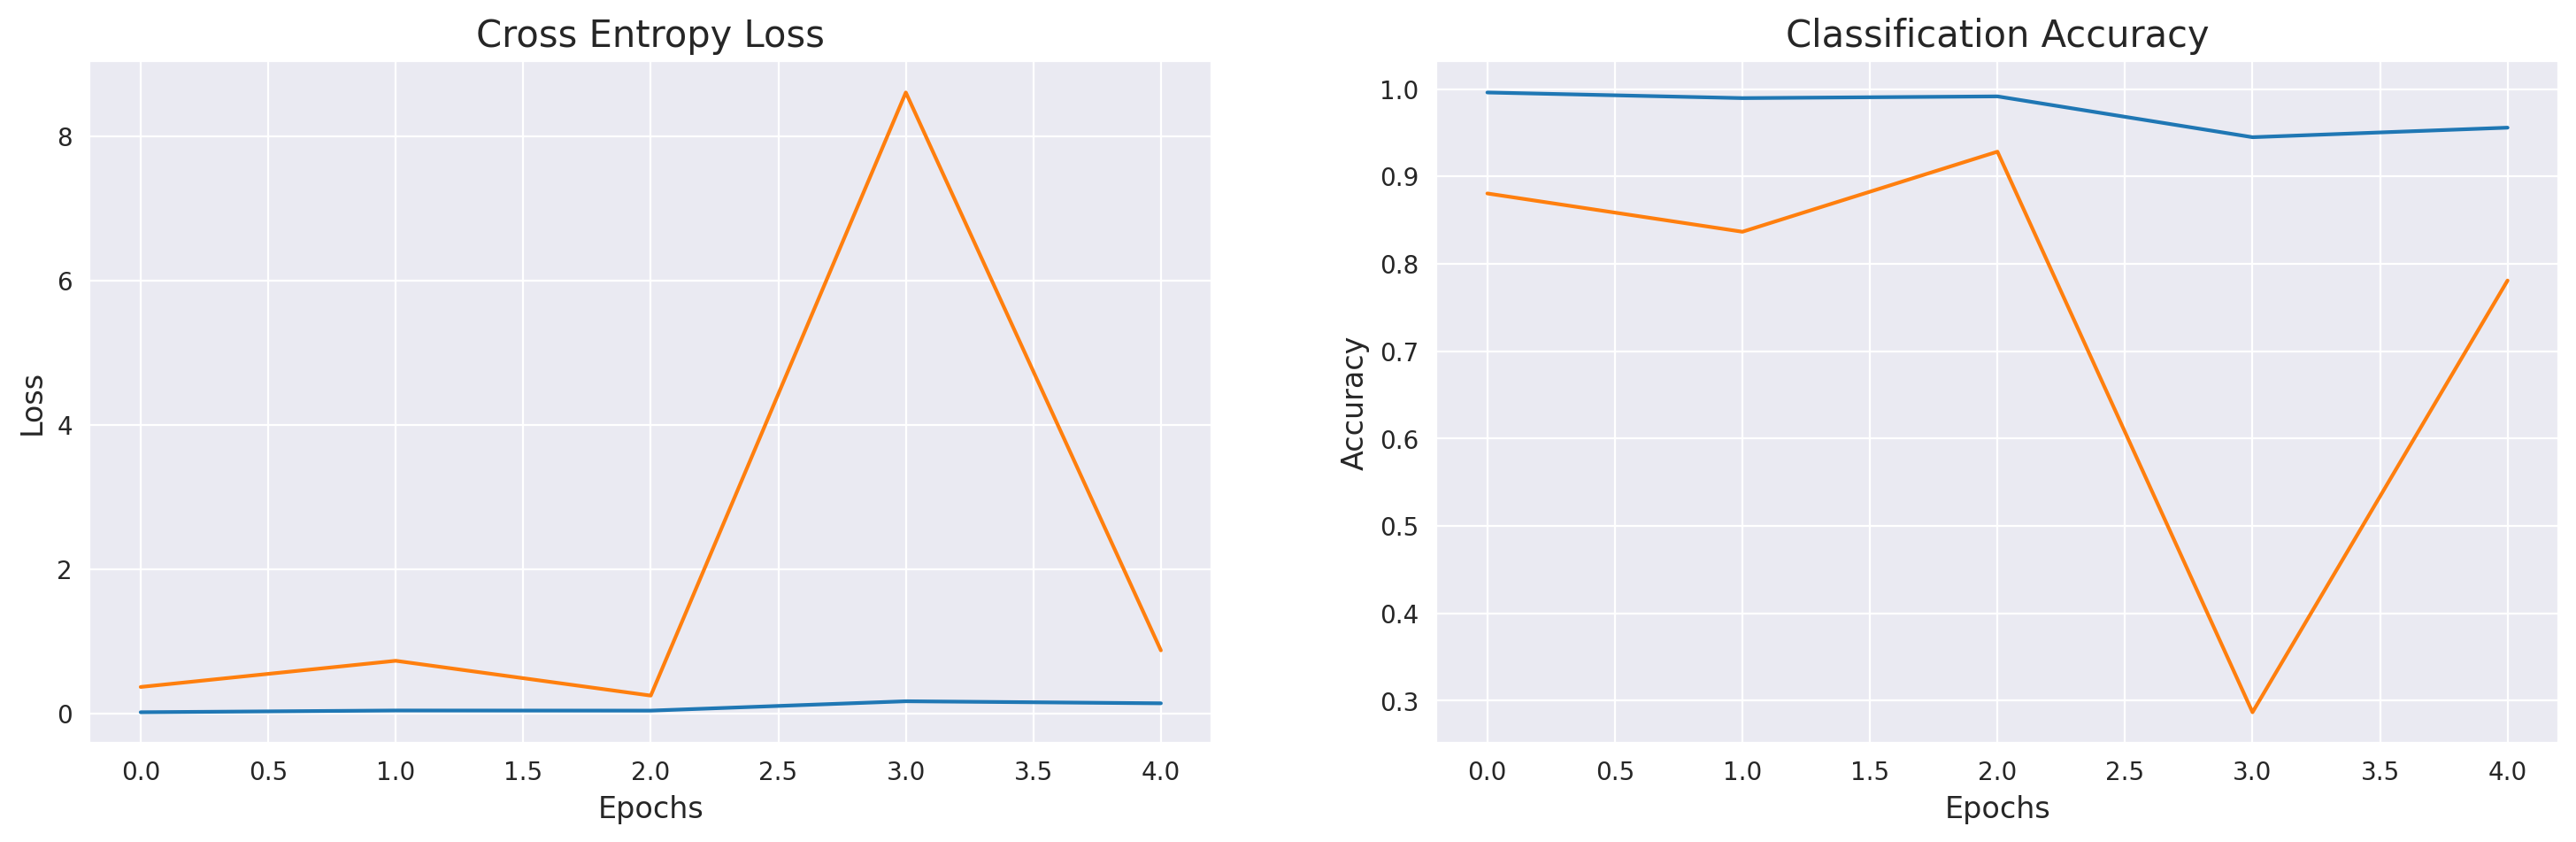

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(asl_class.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [ ]:
# prediction
result = model.predict(test_data,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

# Evaluate
loss,acc = model.evaluate(test_data,verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 75.79365372657776
The Loss of the model for testing data is: 1.1073065996170044


In [ ]:
p = y_pred
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 191
Incorrect predicted classes: 61


In [ ]:
print(classification_report(y_true, y_pred,target_names= categories.values()))

              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.50      1.00      0.67         7
           2       0.86      0.86      0.86         7
           3       0.88      1.00      0.93         7
           4       1.00      0.14      0.25         7
           5       0.54      1.00      0.70         7
           6       1.00      0.43      0.60         7
           7       0.78      1.00      0.88         7
           8       1.00      0.57      0.73         7
           9       0.78      1.00      0.88         7
           a       0.27      1.00      0.42         7
           b       1.00      0.57      0.73         7
           c       1.00      0.86      0.92         7
           d       0.88      1.00      0.93         7
           e       1.00      1.00      1.00         7
           f       1.00      1.00      1.00         7
           g       0.86      0.86      0.86         7
           h       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
